## Importing Algorithms and Loading Data

In [1]:
from utils import *

In [10]:
with open('_preproc_data/normalized_testing_training_data_red.pkl', 'rb') as f:
    normalized_testing_training_data_red = pickle.load(f)
    
X_train_red, X_train, X_test = normalized_testing_training_data_red['X_train_red'], \
normalized_testing_training_data_red['X_train'], \
normalized_testing_training_data_red['X_test']

Y_train_red, Y_train, Y_test = normalized_testing_training_data_red['Y_train_red'], \
normalized_testing_training_data_red['Y_train'], \
normalized_testing_training_data_red['Y_test']

# Additional preprocessing
print(f"Y_train_red (shape) = {Y_train_red.shape}")
Y_train_red = np.reshape(Y_train_red, -1)
print(f"Y_train_red (shape) = {Y_train_red.shape}")

print(f"Y_test (shape) = {Y_test.shape}")
Y_test = np.reshape(Y_test, -1)
print(f"Y_test (shape) = {Y_test.shape}")

Y_train_red (shape) = (34116, 1)
Y_train_red (shape) = (34116,)
Y_test (shape) = (242734, 1)
Y_test (shape) = (242734,)


## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression algorithm
log_reg = LogisticRegression(solver = 'lbfgs', C = 10)

log_reg.fit(X_train_red, Y_train_red)

/Users/sergio.dorado/miniconda3/envs/sd_dev_tf_1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10)

In [12]:
# Getting predictions
Y_pred = log_reg.predict(X_test)

# Computing precision
precision_score(Y_test, Y_pred, average = 'macro')

0.6814577072197987

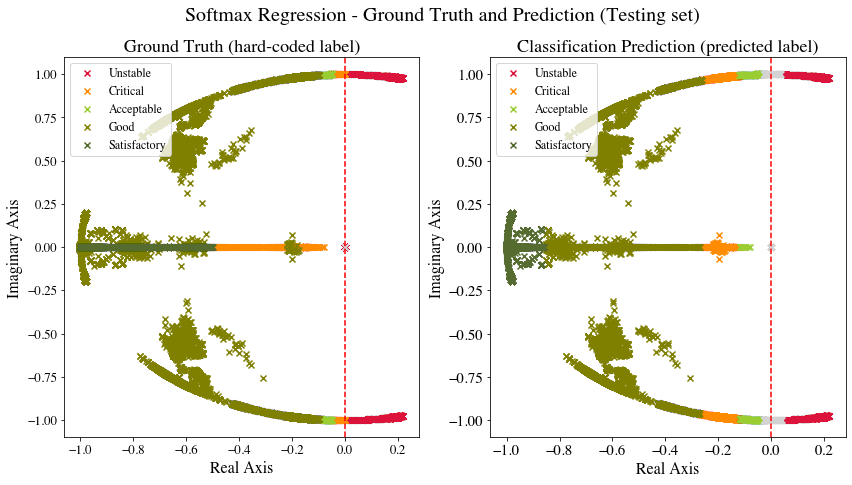

In [13]:
prediction_plotting(X_test, Y_test, Y_pred, model_name = "Softmax Regression", fontname = "Times")

## Linear Support Vector Machines

In [14]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C = 10, loss = 'hinge', max_iter = 200000)

svm_clf.fit(X_train_red, Y_train_red)

LinearSVC(C=10, loss='hinge', max_iter=200000)

In [15]:
Y_pred = svm_clf.predict(X_test)

precision_score(Y_test, Y_pred, average = 'macro')

/Users/sergio.dorado/miniconda3/envs/sd_dev_tf_1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.46519196509674504

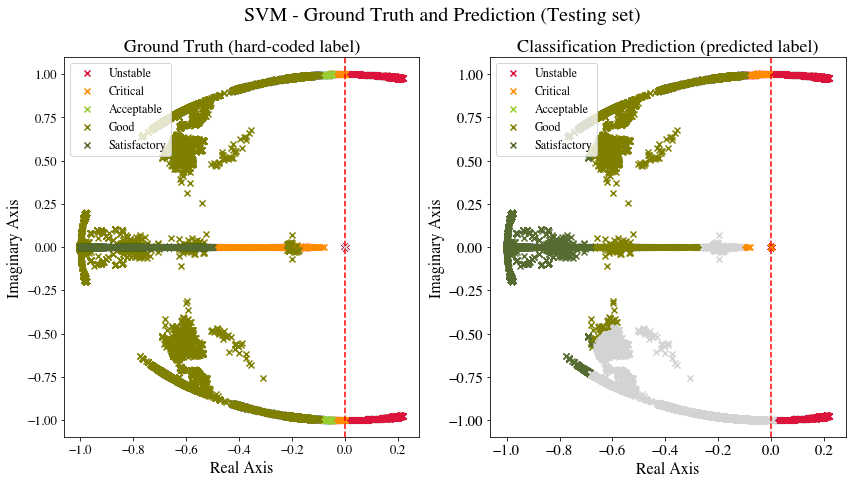

In [16]:
prediction_plotting(X_test, Y_test, Y_pred, model_name = "SVM", fontname = "Times")

## k-Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Loop to select the `n_neighbors` hyperparameter
for n in range(1, 6):
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train_red, Y_train_red)
    print(f"n_neighbors = {n}")
    # Training accuracy
    print(f"Training accuracy: {clf.score(X_train_red, Y_train_red)}")

n_neighbors = 1
Training accuracy: 1.0
n_neighbors = 2
Training accuracy: 0.9998534412006097
n_neighbors = 3
Training accuracy: 0.9995896353617071
n_neighbors = 4
Training accuracy: 0.9994723883221949
n_neighbors = 5
Training accuracy: 0.9993551412826827


In [24]:
clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(X_train_red, Y_train_red)

KNeighborsClassifier(n_neighbors=2)

In [26]:
t_0 = time.time()
Y_pred = clf.predict(X_test)
t_f = time.time() - t_0
print(t_f)

precision_score(Y_test, Y_pred, average = 'macro')

7.60283899307251


0.9981701806539838

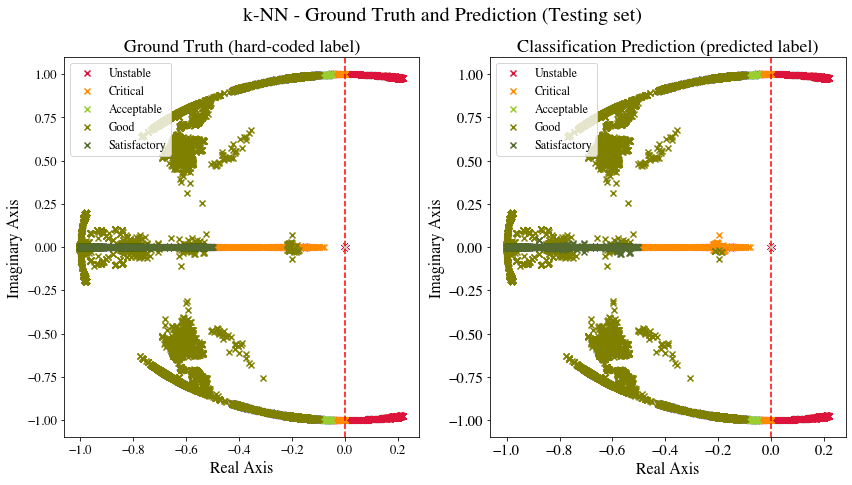

In [20]:
prediction_plotting(X_test, Y_test, Y_pred, model_name = "k-NN", fontname = "Times")

## Decision Trees

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Loop for selecting the `max_depth` hyperparameter
for max_d in range(1, 10):
    tree = DecisionTreeClassifier(max_depth = max_d, random_state = 0)
    tree.fit(X_train_red, Y_train_red)
    print(f"Depth: {max_d}")
    print(f"Training accuracy: {tree.score(X_train_red, Y_train_red)}")

Depth: 1
Training accuracy: 0.3333333333333333
Depth: 2
Training accuracy: 0.6291476140227459
Depth: 3
Training accuracy: 0.7930003517411185
Depth: 4
Training accuracy: 0.898727869621292
Depth: 5
Training accuracy: 0.9208289365693516
Depth: 6
Training accuracy: 0.9393539688122875
Depth: 7
Training accuracy: 0.9624809473560793
Depth: 8
Training accuracy: 0.9624809473560793
Depth: 9
Training accuracy: 0.9624809473560793


In [22]:
tree = DecisionTreeClassifier(max_depth = 7, random_state = 0)
tree.fit(X_train_red, Y_train_red)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [27]:
t_0 = time.time()
Y_pred = tree.predict(X_test)
t_f = time.time() - t_0

print(t_f)

precision_score(Y_test, Y_pred, average = 'macro')

0.014284849166870117


0.9350378159286478

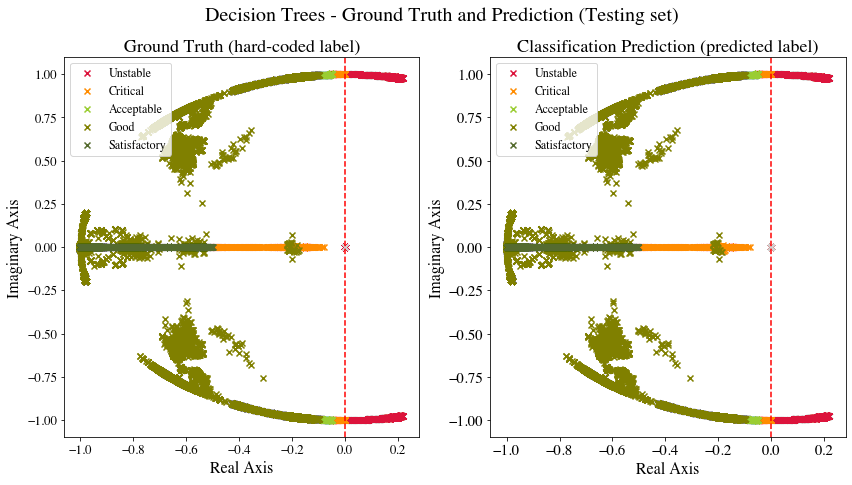

In [28]:
prediction_plotting(X_test, Y_test, Y_pred, model_name = "Decision Trees", fontname = "Times")

## Naïve-Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_red, Y_train_red)

GaussianNB()

In [30]:
t_0 = time.time()
Y_pred = gnb.predict(X_test)
t_f = time.time() - t_0

print(t_f)

precision_score(Y_test, Y_pred, average = 'macro')

0.08330321311950684


0.8621083936097088

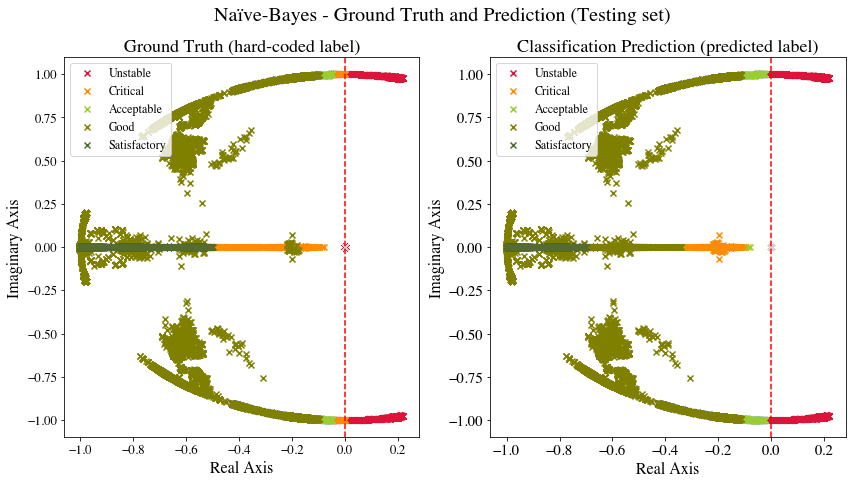

In [31]:
prediction_plotting(X_test, Y_test, Y_pred, model_name = "Naïve-Bayes", fontname = "Times")